<a href="https://colab.research.google.com/github/glazedonut/IEClusteingAnalysisProject/blob/master/report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Roka Hosono, Veda Upasan Pedagadi, Jahnavi Chowdary Tumati
11/7/2022
Project 1: Cluster Analysis


Task 1:

C:\Users\hoson\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\hoson\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


7
Adjusted Rand Score: 1.0
Normalized Mutual Info Score: 1.0
Adjusted Mutual Info Score: 1.0
Fowlkes Mallows Score: 1.0


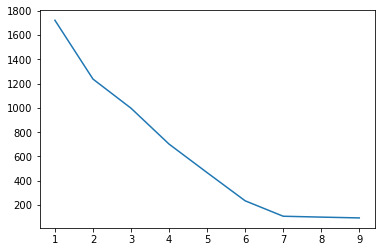

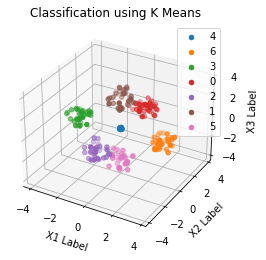

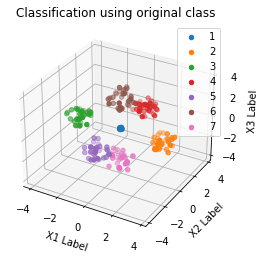

In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import adjusted_rand_score, normalized_mutual_info_score, adjusted_mutual_info_score, fowlkes_mallows_score

def create_K_meanselbow_task1(file): #K means classification
    data=pd.read_csv(file)
    coordinates=data[['X1','X2','X3']]
    inertia=[]
    for i in range(1,10):
        k_means=KMeans(n_clusters=i,init='k-means++',random_state=42)
        k_means.fit(coordinates)
        inertia.append(k_means.inertia_)
    
    sns.lineplot(np.arange(1,10), inertia)
    dydx=[]
    numclass=max(list(data['Class']))
    print(numclass)
    opt_k=KMeans(n_clusters=numclass,init='k-means++',random_state=42)
    metrics=opt_k.fit_predict(coordinates)
    data['cluster_class']=metrics
    validate_Kmeans_Supervised(data)
    return data

def create_hiearchal_Classification_task1(file):
    data=pd.read_csv(file)
    #Write code to do heiarchal Classification for task 1 Here
    return data

def validate_Kmeans_Supervised(data):
    adj=adjusted_rand_score(data['Class'],data['cluster_class'])
    norm=normalized_mutual_info_score(data['Class'],data['cluster_class'])
    adjmut=adjusted_mutual_info_score(data['Class'],data['cluster_class'])
    fowlkes=fowlkes_mallows_score(data['Class'],data['cluster_class'])
    print("Adjusted Rand Score:",adj)
    print("Normalized Mutual Info Score:",norm)
    print("Adjusted Mutual Info Score:",adjmut)
    print("Fowlkes Mallows Score:",fowlkes)
    
    
def create_3dscatter(data):    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.set_title("Classification using K Means")
    for i in data.cluster_class.unique():
        data2=data.loc[data['cluster_class']==i]
        ax.scatter(data2['X1'], data2['X2'], data2['X3'],label=i)
    ax.set_xlabel('X1 Label')
    ax.set_ylabel('X2 Label')
    ax.set_zlabel('X3 Label')
    ax.legend()    
    fig2 = plt.figure()
    ax2 = fig2.add_subplot(111, projection='3d')
    ax2.set_title("Classification using original class")
    for i in data['Class'].unique():
        data2=data.loc[data['Class']==i]
        ax2.scatter(data2['X1'], data2['X2'], data2['X3'],label=i)
    ax2.set_xlabel('X1 Label')
    ax2.set_ylabel('X2 Label')
    ax2.set_zlabel('X3 Label')
    ax2.legend()



data=create_K_meanselbow_task1("data/data1.csv")
create_3dscatter(data)

C:\Users\hoson\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\hoson\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


4
Adjusted Rand Score: 0.5877644016112638
Normalized Mutual Info Score: 0.7254665452893712
Adjusted Mutual Info Score: 0.7227234211971404
Fowlkes Mallows Score: 0.7237292929817782


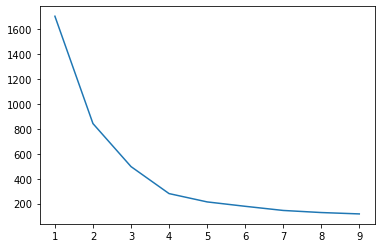

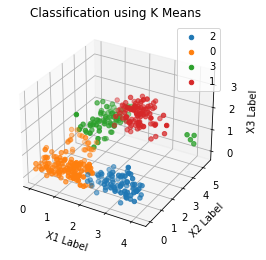

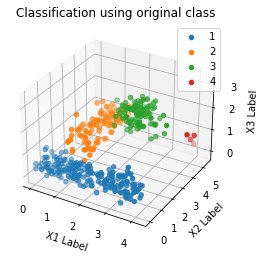

In [53]:
data2=create_K_meanselbow_task1("data/data2.csv")
create_3dscatter(data2)

C:\Users\hoson\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\hoson\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


4
Adjusted Rand Score: 1.0
Normalized Mutual Info Score: 1.0
Adjusted Mutual Info Score: 1.0
Fowlkes Mallows Score: 1.0


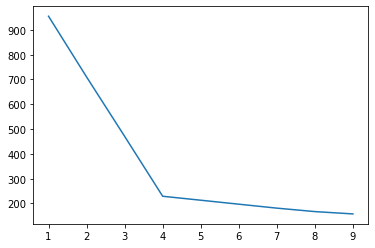

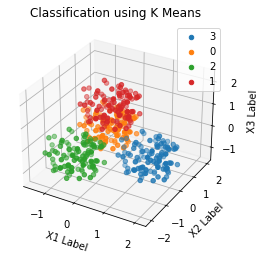

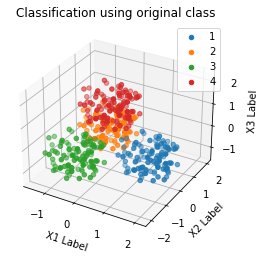

In [54]:
data3=create_K_meanselbow_task1("data/data3.csv")
create_3dscatter(data3)

C:\Users\hoson\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\hoson\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


2
Adjusted Rand Score: 0.09272782327563998
Normalized Mutual Info Score: 0.06864017084884316
Adjusted Mutual Info Score: 0.06796683978569128
Fowlkes Mallows Score: 0.5459107296389125


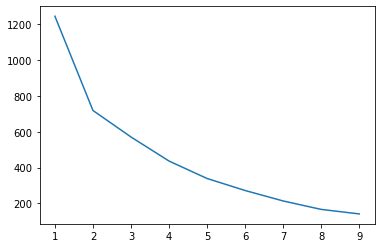

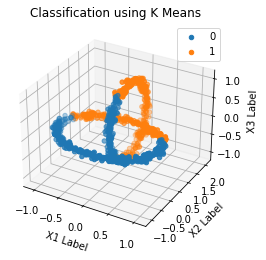

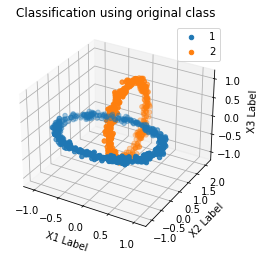

In [55]:
data4=create_K_meanselbow_task1("data/data4.csv")
create_3dscatter(data4)

C:\Users\hoson\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\hoson\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


2
Adjusted Rand Score: 0.1885336032086663
Normalized Mutual Info Score: 0.2981230883845461
Adjusted Mutual Info Score: 0.29739914825677755
Fowlkes Mallows Score: 0.6559262338078193


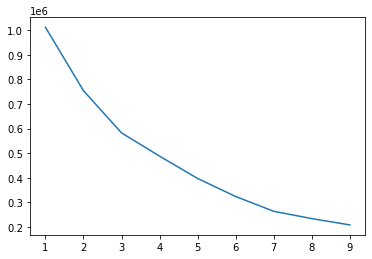

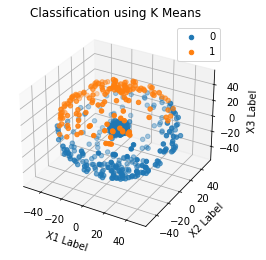

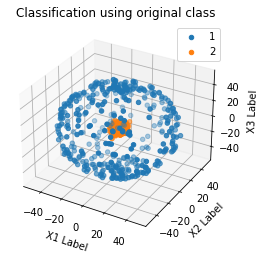

In [56]:
data5=create_K_meanselbow_task1("data/data5.csv")
create_3dscatter(data5)

C:\Users\hoson\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


2
Adjusted Rand Score: 0.815060637690859
Normalized Mutual Info Score: 0.7296025389701776
Adjusted Mutual Info Score: 0.7295548463219651
Fowlkes Mallows Score: 0.9076346454086384


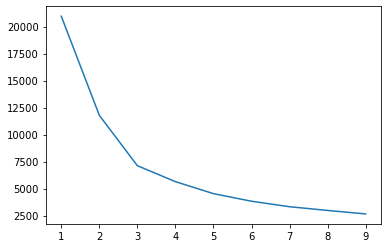

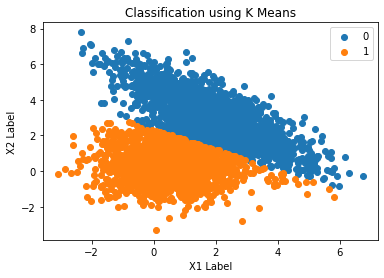

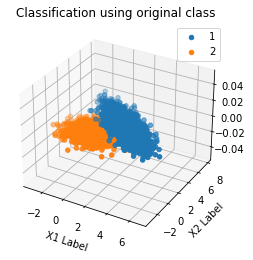

In [59]:
def create_K_meanselbow_task1_2d(file): #K means classification
    data=pd.read_csv(file)
    coordinates=data[['X1','X2']]
    inertia=[]
    for i in range(1,10):
        k_means=KMeans(n_clusters=i,init='k-means++',random_state=42)
        k_means.fit(coordinates)
        inertia.append(k_means.inertia_)
    
    sns.lineplot(np.arange(1,10), inertia)
    dydx=[]
    numclass=max(list(data['Class']))
    print(numclass)
    opt_k=KMeans(n_clusters=numclass,init='k-means++',random_state=42)
    metrics=opt_k.fit_predict(coordinates)
    data['cluster_class']=metrics
    validate_Kmeans_Supervised(data)
    return data
def create_2dscatter(data):    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_title("Classification using K Means")
    for i in data.cluster_class.unique():
        data2=data.loc[data['cluster_class']==i]
        ax.scatter(data2['X1'], data2['X2'],label=i)
    ax.set_xlabel('X1 Label')
    ax.set_ylabel('X2 Label')
    ax.legend()    
    fig2 = plt.figure()
    ax2 = fig2.add_subplot(111, projection='3d')
    ax2.set_title("Classification using original class")
    for i in data['Class'].unique():
        data2=data.loc[data['Class']==i]
        ax2.scatter(data2['X1'], data2['X2'],label=i)
    ax2.set_xlabel('X1 Label')
    ax2.set_ylabel('X2 Label')
    ax2.legend()
    
data6=create_K_meanselbow_task1_2d("data/data6.csv")
create_2dscatter(data6)

C:\Users\hoson\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\hoson\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


6
Adjusted Rand Score: 0.6354381101871709
Normalized Mutual Info Score: 0.6365532632828066
Adjusted Mutual Info Score: 0.6315785106497546
Fowlkes Mallows Score: 0.7927128692157276


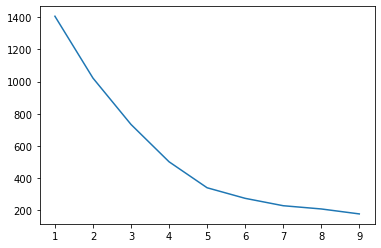

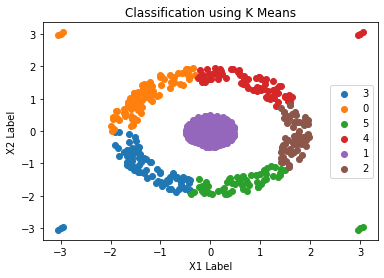

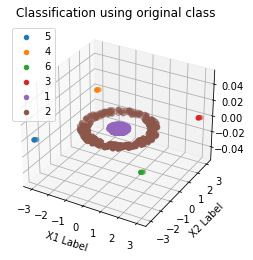

In [60]:
data7=create_K_meanselbow_task1_2d("data/data7.csv")
create_2dscatter(data7)


C:\Users\hoson\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


1
Adjusted Rand Score: 1.0
Normalized Mutual Info Score: 1.0
Adjusted Mutual Info Score: 1.0
Fowlkes Mallows Score: 1.0


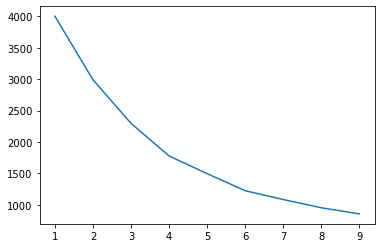

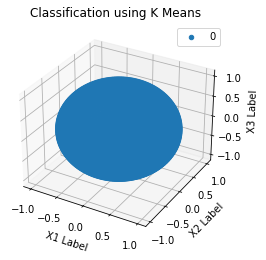

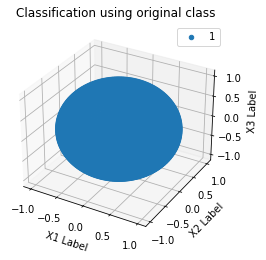

In [61]:
data8=create_K_meanselbow_task1("data/data8.csv")
create_3dscatter(data8)

Task 2:

In [ ]:
def intervention(indicies): #You will probably need this????
    interevent=[]
    for i in range(0,len(indicies)):
        if i==0:
            interevent.append(0)
        else:
            interevent.append(abs(indicies[i]-indicies[i-1]))
    return interevent
def create_K_meanselbow_task2(file):
    #Write code to do K means algo for task 2 here
    data=pd.read_csv(file)
    return data
def create_Heiarchal_task2(file):
    #Write code to do K means algo for task 2 here
    data=pd.read_csv(file)
    return data
def create_hiearchal_Classification_task1(file):
    #Write code to do Heiarchal classification for task 2 here
    data=pd.read_csv(file)
    return data
def validate Kmeans_Unsupervised(data):
    #write code to find Internal Validation scores here
    print('Todo!')